Step 1: Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

Step 2: Read all xlsx files into one general dataframe

In [ ]:
path_1 = "/Users/lucaleustean/Documents/Projects/NHL Stats/All Stats"
files_list = os.listdir(path_1)
files_list.remove('.DS_Store')

'''Code below is meant to sort the file names to make sure they are in order from 1-61, 
otherwise file 2 comes after file 19'''
start = files_list[0][:20]
temp = [int(elem[20:-5]) for elem in files_list]
temp_sorted = sorted(temp)
files_list = [start + str(elem)+".xlsx" for elem in temp_sorted]


stats_df = pd.read_excel((path_1 + "/" + files_list[0]))
for file in files_list[1:]:
    path_2 = path_1 + "/" + file
    df = pd.read_excel(path_2)
    frames = [stats_df, df]
    stats_df = pd.concat(frames)

stats_df = stats_df[stats_df['Draft Yr'] != '--'].reset_index() #removing all rows of data in which player was not drafted

for stat in ['G', 'A', 'P', 'GP']:
    int_stat = stats_df[stat].apply(lambda x: str2int(x))
    stats_df.loc[:, stat] = int_stat

#print(stats_df.head(20))

In [ ]:
def points(stats_df, yr):
    
    #information about the number of players that draft year
    yr_df = stats_df[stats_df['Draft Yr'] == yr]
    player_count = yr_df.groupby('Round').Player.count.reset_index()
    player_count = player_count.Player.values
    
    '''
    #making sure all string values are converted to integer so they can be summed
    int_p = yr_df.P.apply(lambda x: str2int(x))
    yr_df.iloc[:, 'P'] = int_p
    int_gp = yr_df.GP.apply(lambda x: str2int(x))
    yr_df.iloc[:, 'GP'] = int_gp
    '''
    
    #information about point totals from each round
    points = yr_df.groupby('Round').P.sum().reset_index()
    tot_points = points.P.values
    
    ppg = []
    for round_no in points.Round.values:
        round_yr_df = yr_df[yr_df.Round == round_no]
        ppg_sum=0
        for i in range(len(round_yr_df)):
            player_ppg = round_yr_df.loc[i, 'P'].values/yr_df.loc[i, 'GP'].values
            ppg_sum += player_ppg
        ppg_round_avg = ppg_sum/player_count[round_no]
        ppg = ppg.append[ppg_round_avg]
        
        
    

Step 3: Create a function to obtain the wanted stats from the specific draft class

In [285]:
def stat_wanted(stats_df, yr, stat, top_no=1):
    
    stat = stat.upper()
    if stat == 'GAMES PLAYED':
        stat = 'GP'
    elif stat == 'GOALS':
        stat = 'G'
    elif stat == 'ASSISTS':
        stat = 'A'
    elif stat == 'POINTS':
        stat = 'P'
    
    yr_df = stats_df[stats_df['Draft Yr'] == yr]
    player_count = yr_df.groupby('Round').Player.count().reset_index()
    player_count = player_count.Player.values
    
    
    stat_series = yr_df.groupby('Round')[stat].sum().reset_index()
    stat_values = stat_series[stat].values
    avg = stat_values/player_count
    
    ordered_yr_df = yr_df.sort_values(stat, ascending = False).reset_index()
    leader_stats = ordered_yr_df.loc[0:top_no, ['Player', 'Round', 'Overall',stat]]
    leader_stats = leader_stats.reindex(list(range(1,top_no+1)))
    #leader = leader_stats.Player.values
    #draft_round = leader_stats.Round.values
    #leader_stat = leader_stats[stat].values
    return [stat_values, player_count, leader_stats]
    

Step 4: Define Bar Graph Functions to display your data

In [329]:
def stats_bar(totals, stat, yr):
    
    stat = stat[0].upper() + stat[1:].lower()
   #print(player_count[0] == 1)
    #if all(player_count) != 1:
       # player_count = [1 for i in range(len(totals))]
    
    #print(player_count)
    #avg = totals/player_count
    
    ax = plt.subplot()
    plt.bar(range(len(totals)), totals)
    ax.set_xticks(range(len(totals)))
    ax.set_xticklabels(range(1,len(totals)+1))

   
    title = str(yr) + ' NHL Entry Draft ' + stat + ' Totals by Round'
    
    plt.title(title)
    plt.xlabel('Round'), plt.ylabel(stat)
    plt.show()
    
def avg_stats_bar(totals, player_count, stat, yr):
    
    stat = stat[0].upper() + stat[1:].lower()
    avg = totals/player_count
    
    ax = plt.subplot()
    avg_bar = plt.bar(range(len(avg)), avg, color = 'r')
    ax.set_xticks(range(len(avg)))
    ax.set_xticklabels(range(1,len(avg)+1))


    title = str(yr) + ' NHL Entry Draft ' + stat + ' Averages by Round'
    plt.title(title)
    plt.xlabel('Round'), plt.ylabel(stat + ' Per Player')
    plt.show()

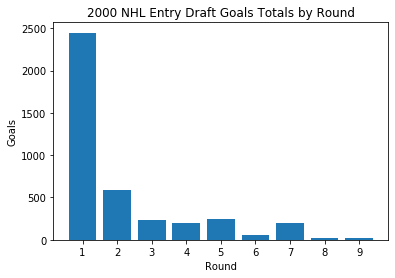

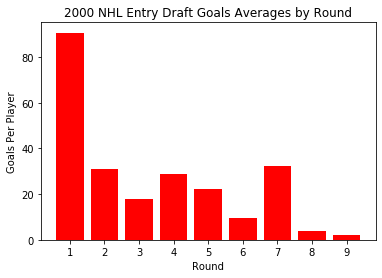

goals Leaders

               Player Round Overall    G
1        Dany Heatley     1       2  372
2      Scott Hartnell     1       6  327
3     Justin Williams     1      28  320
4    Antoine Vermette     2      55  228
5          Brad Boyes     1      24  211
6         Alex Frolov     1      20  175
7        Raffi Torres     1       5  137
8   Lubomir Visnovsky     4     118  128
9           Steve Ott     1      25  109
10      Dominic Moore     3      95  106


In [334]:
yr = 2000
stat = 'goals'
top_list = 10

(totals, player_count, leader) = stat_wanted(stats_df, yr, stat, top_list)

#print(player_count)
stats_bar(totals, stat, yr)
avg_stats_bar(totals, player_count, stat, yr)



print('{} Leaders\n'.format(stat))
print(leader)
#print('{} {} Leader:\t{}\nRound Drafted:\t{}\n{}: {}'.format(yr, stat, leader[0][0], leader[1][0], stat, leader[2][0]))

In [168]:
def str2int(val):
    if type(val) == int:
        #print(type(val))
        return val
    elif (',' in val):
        #print(val)
        temp_vals = val.split(sep=',')
        val = ''
        for i in range(len(temp_vals)):
            val += temp_vals[i]
        val = int(val)
        #print(val, type(val))
        return val
    else:
        print('Invalid input into str2int')
    

In [280]:
'Auston Matthews' in stats_df.Player.values

True

In [349]:
def player_comparison(stats_df, player):
    player_df = stats_df[stats_df.Player == player]

    
    draft_yr = player_df['Draft Yr'].values[0]
    #print(draft_yr)
    draft_round = player_df.Round.values[0]
    draft_overall = player_df.Overall.values[0]
    
    
    
    yr_df = stats_df[stats_df['Draft Yr'] == draft_yr]
    yr_df['GPG'] = yr_df.G/stats_df.GP
    yr_df['APG'] = yr_df.A/stats_df.GP
    yr_df['PPG'] = yr_df.P/stats_df.GP
    
    player_df = yr_df[stats_df.Player == player]
    
    player_g = player_df.G.values[0]
    player_gpg = player_df.GPG.values[0]
    player_a = player_df.A.values[0]
    player_apg = player_df.APG.values[0]
    player_p = player_g + player_a
    player_ppg = player_df.PPG.values[0]
    
    #find the averages first
    #Goal Stats
    (g_totals, player_count, leader) = stat_wanted(yr_df, draft_yr, 'G')
    g_avg_class = sum(g_totals)/sum(player_count)
    g_avg_round = g_totals[draft_round-1]/player_count[draft_round-1]
    
    (gpg_totals, player_count, leader) = stat_wanted(yr_df, draft_yr, 'GPG')
    gpg_avg_class = sum(gpg_totals)/sum(player_count)
    gpg_avg_round = gpg_totals[draft_round-1]/player_count[draft_round-1]
    
    #Assist Stats
    (a_totals, player_count, leader) = stat_wanted(yr_df, draft_yr, 'A')
    a_avg_class = sum(a_totals)/sum(player_count)
    a_avg_round = a_totals[draft_round-1]/player_count[draft_round-1]
    
    (apg_totals, player_count, leader) = stat_wanted(yr_df, draft_yr, 'APG')
    apg_avg_class = sum(apg_totals)/sum(player_count)
    apg_avg_round = apg_totals[draft_round-1]/player_count[draft_round-1]
    
    #Point Stats
    p_totals = g_totals + a_totals
    p_avg_class = sum(p_totals)/sum(player_count)
    p_avg_round = p_totals[draft_round-1]/player_count[draft_round-1]
    
    (ppg_totals, player_count, leader) = stat_wanted(yr_df, draft_yr, 'PPG')
    ppg_avg_class = sum(ppg_totals)/sum(player_count)
    ppg_avg_round = ppg_totals[draft_round-1]/player_count[draft_round-1]
    
    #Obtaining a list with the comparisons
    g_vals = [player_g, g_avg_class, (player_g - g_avg_class), g_avg_round, (player_g - g_avg_round)]
    gpg_vals = [player_gpg, gpg_avg_class, (player_gpg - gpg_avg_class), gpg_avg_round, (player_gpg - gpg_avg_round)]
    
    a_vals = [player_a, a_avg_class, (player_a - a_avg_class), a_avg_round, (player_a - a_avg_round)]
    apg_vals = [player_apg, apg_avg_class, (player_apg - apg_avg_class), apg_avg_round, (player_apg - apg_avg_round)]
    
    p_vals = [player_p, p_avg_class, (player_p - p_avg_class), p_avg_round, (player_p - p_avg_round)]
    ppg_vals = [player_ppg, ppg_avg_class, (player_ppg - ppg_avg_class), ppg_avg_round, (player_ppg - ppg_avg_round)]
    
    return(g_vals, gpg_vals, a_vals, apg_vals, p_vals, ppg_vals)
    #a_ordered_df = yr_df.sort_values(P, ascending = False).reset_index()
    #g_ordered_df = yr_df.sort_values(G, ascending = False).reset_index()

In [357]:
(g_vals, gpg_vals, a_vals, apg_vals, p_vals, ppg_vals) = player_comparison(stats_df, 'Connor McDavid')
print(gpg_vals)

2015
[0.46153846153846156, 0.12841474458365562, 0.3331237169548059, 0.20196412185623616, 0.25957433968222543]


/Users/lucaleustean/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/lucaleustean/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/lucaleustean/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [358]:
print(stats_df.info)

<bound method DataFrame.info of       index             Player S/C Pos         DOB        Birth City S/P Ctry  \
0         0        Antti Aalto   L   C  1975-03-04      Lappeenranta  --  FIN   
1         2  Justin Abdelkader   L   L  1987-02-25          Muskegon  MI  USA   
2         4       Pontus Aberg   R   L  1993-09-23         Stockholm  --  SWE   
3         5     Dennis Abgrall   R   R  1953-04-24           Tisdale  SK  CAN   
4         6         Ramzi Abid   L   L  1980-03-24          Montreal  QC  CAN   
...     ...                ...  ..  ..         ...               ...  ..  ...   
4501     56     Dainius Zubrus   L   C  1978-06-16        Elektrenai  --  LTU   
4502     58       Jason Zucker   L   L  1992-01-16     Newport Beach  CA  USA   
4503     59          Mike Zuke   R   C  1954-04-16  Sault Ste. Marie  ON  CAN   
4504     60     Valentin Zykov   R   L  1995-05-15    St. Petersburg  --  RUS   
4505     61      Andrei Zyuzin   L   D  1978-01-21               Ufa  --  RUS